# Two Node Scenarios

In [1]:
from pathlib import Path

import numpy as np

from idmlaser.numpynumba import DemographicsByYear
from idmlaser.models.numpynumba import NumbaSpatialSEIR
from idmlaser.utils import GrabBag

metaparams = GrabBag({
    "ticks": 365,
    "nodes": 1,
    "seed": 20240625,
    "output": Path.cwd() / "outputs",
})

modelparams = GrabBag({
    "exp_mean": np.float32(7.0),
    "exp_std": np.float32(1.0),
    "inf_mean": np.float32(7.0),
    "inf_std": np.float32(1.0),
    "r_naught": np.float32(14.0),
    "seasonality_factor": np.float32(0.125),
    "seasonality_offset": np.float32(182),
})

params = GrabBag(metaparams, modelparams)

model = NumbaSpatialSEIR(params)

# Ignore optional parameters, cbr, mortality, and immigration
demographics = DemographicsByYear(nyears=10, nnodes=2)
CAPACITY = 1_000_000
demographics.initialize(initial_population = np.array([CAPACITY, CAPACITY], dtype=np.uint32))

max_capacity = CAPACITY * 2
INFECTIONS = 10
initial = np.zeros((2, 4), dtype=np.uint32)
initial[0,:] = [100_000, 0, INFECTIONS, 899_990] # S, E, I, R
initial[1,:] = [CAPACITY, 0, 0, 0]  # all susceptible
network = np.array([[0, 0.05], [0.025, 0 ]], dtype=np.float32)  # 2x2 network
model.initialize(max_capacity, demographics, initial, network)

Model parameters: {'exp_mean': 7.0, 'exp_std': 1.0, 'inf_mean': 7.0, 'inf_std': 1.0, 'r_naught': 14.0, 'prng_seed': 20240412, 'ticks': 365, 'nodes': 1, 'seed': 20240625, 'output': PosixPath('/workspaces/laser/outputs'), 'seasonality_factor': 0.125, 'seasonality_offset': 182.0, 'beta': 2.0}
Initializing model with 2 nodes: (initial population: 2,000,000 maximum capacity: 2,000,000)


In [2]:
model.run(params.ticks)

100%|██████████| 365/365 [00:03<00:00, 96.39it/s] 

elapsed time: 0:00:03.789349


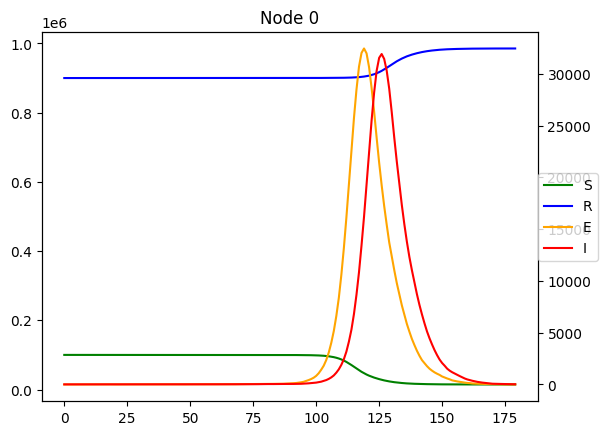

In [3]:
S = model.report[:180, 0, 0]   # first 100 ticks, channel 0, node 0
E = model.report[:180, 1, 0]
I = model.report[:180, 2, 0]
R = model.report[:180, 3, 0]

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.plot(S, label='S', color="green")
plt.plot(R, label='R', color="blue")
ax2 = ax1.twinx()
# ax2.set_yscale("log")
plt.plot(E, label='E', color="orange")
plt.plot(I, label='I', color="red")
plt.title(f"Node 0")
fig.legend(loc="center right")
plt.show()

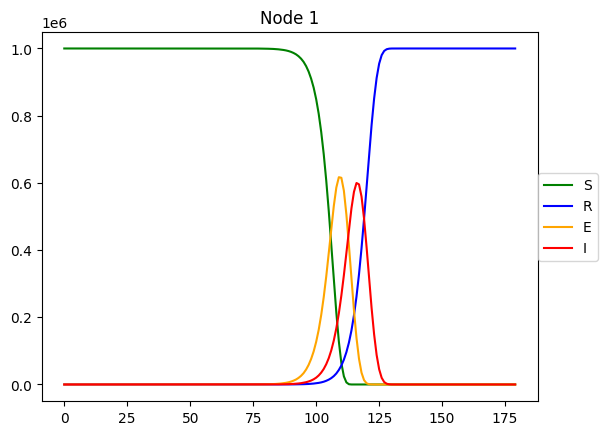

In [4]:
S = model.report[:180, 0, 1]   # first 100 ticks, channel 0, node 0
E = model.report[:180, 1, 1]
I = model.report[:180, 2, 1]
R = model.report[:180, 3, 1]

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.plot(S, label='S', color="green")
plt.plot(R, label='R', color="blue")
# ax2 = ax1.twinx()
# ax2.set_yscale("log")
plt.plot(E, label='E', color="orange")
plt.plot(I, label='I', color="red")
plt.title(f"Node 1")
fig.legend(loc="center right")
plt.show()